In [36]:
import pandas as pd
import numpy as np
#import sqlite3
from sqlalchemy import create_engine
import seaborn as sns

In [3]:
engine = create_engine('sqlite:///db/diamonds_m2.db')
connection = engine.connect()
# connection = create_engine('sqlite:///diamonds_m1.db').connect()

In [4]:
print(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", connection))

                     name
0     diamonds_dimensions
1  diamonds_transactional
2     diamonds_properties
3            diamonds_cut
4          diamonds_color
5        diamonds_clarity
6           diamonds_city


In [5]:
query_diamonds_full = '''
SELECT 
    d_prop.index_id,
    d_city.city,
    d_dim.depth,
    d_dim.'table',
    d_dim.x,
    d_dim.y,
    d_dim.z,
    d_tran.price,
    d_cut.cut,
    d_col.color,
    d_clar.clarity,
    d_tran.carat   
FROM diamonds_properties as d_prop
    INNER JOIN diamonds_clarity as d_clar ON d_prop.clarity_id = d_clar.clarity_id
    INNER JOIN diamonds_color as d_col ON d_prop.color_id = d_col.color_id
    INNER JOIN diamonds_cut as d_cut ON d_prop.cut_id = d_cut.cut_id
    INNER JOIN diamonds_dimensions as d_dim ON d_prop.index_id = d_dim.index_id
    INNER JOIN diamonds_transactional as d_tran ON d_prop.index_id = d_tran.index_id
    INNER JOIN diamonds_city as d_city ON d_tran.city_id = d_city.city_id
'''

df_diamonds_full = pd.read_sql_query(query_diamonds_full,connection)
df_diamonds_full

,index_id,city,depth,table,x,y,z,price,cut,color,clarity,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,Dubai,62.4,58.0,6.83,6.79,4.25,4268,Premium,J,VS2,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,Kimberly,63.0,57.0,4.35,4.38,2.75,505,Very Good,H,VS2,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,Las Vegas,65.5,55.0,5.62,5.53,3.65,2686,Fair,G,VS1,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,Kimberly,63.8,56.0,4.68,4.72,3.00,738,Good,D,SI1,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,Dubai,60.5,59.0,6.55,6.51,3.95,4882,Ideal,G,SI1,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,Antwerp,62.7,57.0,7.10,7.04,4.43,10070,Ideal,G,VS1,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,Madrid,57.1,60.0,8.31,8.25,4.73,12615,Good,F,SI2,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,Kimberly,62.7,56.0,6.37,6.42,4.01,5457,Ideal,H,SI1,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,Kimberly,61.9,54.3,4.45,4.47,2.76,456,Ideal,J,VS1,0.33


In [6]:
query_diamonds_dimensions = """SELECT * FROM diamonds_dimensions"""
df_diamonds_dimensions = pd.read_sql_query(query_diamonds_dimensions,engine)
df_diamonds_dimensions

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [7]:
query_diamonds_transactional = """SELECT * FROM diamonds_transactional"""
df_diamonds_transactional = pd.read_sql_query(query_diamonds_transactional,engine)
df_diamonds_transactional

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [8]:
query_diamonds_properties = """SELECT * FROM diamonds_properties"""
df_diamonds_properties = pd.read_sql_query(query_diamonds_properties,engine)
df_diamonds_properties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [9]:
query_diamonds_cut = """SELECT * FROM diamonds_cut"""
df_diamonds_cut = pd.read_sql_query(query_diamonds_cut,engine)
df_diamonds_cut

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [10]:
query_diamonds_color = """SELECT * FROM diamonds_color"""
df_diamonds_diamonds_color = pd.read_sql_query(query_diamonds_color,engine)
df_diamonds_diamonds_color

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [11]:
query_diamonds_clarity = """SELECT * FROM diamonds_clarity"""
df_diamonds_clarity = pd.read_sql_query(query_diamonds_clarity,engine)
df_diamonds_clarity

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [12]:
query_diamonds_city = """SELECT * FROM diamonds_city"""
df_diamonds_city = pd.read_sql_query(query_diamonds_city,engine)
df_diamonds_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [13]:
query_inner = pd.merge(df_diamonds_dimensions,df_diamonds_transactional, on="index_id")
query_inner = pd.merge(query_inner,df_diamonds_properties, on="index_id")
query_inner = pd.merge(query_inner, df_diamonds_cut, on="cut_id")
query_inner = pd.merge(query_inner,df_diamonds_diamonds_color, on="color_id")
query_inner = pd.merge(query_inner,df_diamonds_clarity, on="clarity_id")
#query_inner = pd.merge(query_inner,df_diamonds_clarity, on="clarity_id")
query_inner = pd.merge(query_inner,df_diamonds_city, on="city_id")

query_inner

,index_id,depth,table,x,y,z,price,city_id,carat,cut_id,color_id,clarity_id,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.77,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.57,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,62.2,54.0,5.24,5.27,3.27,2729,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.54,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,Surat
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,61.9,54.0,5.22,5.25,3.24,2802,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.53,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,Surat
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,62.3,55.0,4.30,4.34,2.69,886,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.30,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,Surat
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,60.9,55.0,4.15,4.23,2.55,768,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.26,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,Surat


In [14]:
df_diamonds = query_inner[["index_id","city","depth","table","x","y","z","price","cut","color","clarity", "carat"]]
df_diamonds["gr"] = round(df_diamonds["carat"]*0.2,3)
df_diamonds["mg"] = round(df_diamonds["carat"]*200).astype(int)
df_diamonds


C:\Users\AlvaroSaez\miniconda3\envs\proyect2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\AlvaroSaez\miniconda3\envs\proyect2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index_id,city,depth,table,x,y,z,price,cut,color,clarity,carat,gr,mg
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,Dubai,62.4,58.0,6.83,6.79,4.25,4268,Premium,J,VS2,1.21,0.242,242
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,Dubai,61.6,58.0,6.40,6.35,3.93,3513,Premium,J,VS2,1.02,0.204,204
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,Dubai,62.3,58.0,5.86,5.80,3.63,1792,Premium,J,VS2,0.77,0.154,154
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,Dubai,59.6,60.0,7.58,7.48,4.49,7553,Premium,J,VS2,1.51,0.302,302
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,Dubai,60.2,62.0,5.40,5.33,3.23,1176,Premium,J,VS2,0.57,0.114,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,Surat,62.2,54.0,5.24,5.27,3.27,2729,Ideal,F,IF,0.54,0.108,108
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,Surat,61.9,54.0,5.22,5.25,3.24,2802,Ideal,F,IF,0.53,0.106,106
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,Surat,62.3,55.0,4.30,4.34,2.69,886,Ideal,F,IF,0.30,0.060,60
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,Surat,60.9,55.0,4.15,4.23,2.55,768,Ideal,F,IF,0.26,0.052,52


In [15]:
df_diamonds.to_csv("output_dataset/diamonds_m2.csv", sep=",", index=False)

In [16]:
#---------------------------------

In [17]:
df_diamonds["cut"].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [42]:
df_diamonds["x"].min()

0.0

In [44]:
df_diamonds[df_diamonds["city"]=="Madrid"]

,index_id,city,depth,table,x,y,z,price,cut,color,clarity,carat,gr,mg
12800,a73060afb61efe1b7c817645d00c342df02407f65435a6...,Madrid,58.6,58.0,6.85,6.81,4.00,4422,Premium,J,VS2,1.12,0.224,224
12801,76d6a8153b2e6ea49abf44111408f3d25887ddab9af372...,Madrid,62.2,58.0,8.73,8.67,5.41,18020,Premium,J,VS2,2.51,0.502,502
12802,5ee36f40051aec9076cd20826e9bad65d1c5fa24dc02a6...,Madrid,61.9,61.0,5.12,5.09,3.16,1080,Premium,J,VS2,0.51,0.102,102
12803,1d2db6db4635c05a0902d6f8cb10be58a924c34dee511e...,Madrid,62.4,60.0,4.29,4.33,2.69,380,Premium,J,VS2,0.31,0.062,62
12804,959d6171b513d01400dc5aee3526ad23f8e5781d9903bf...,Madrid,61.5,60.0,8.13,8.07,4.98,13572,Premium,J,VS2,2.01,0.402,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,d48993406eae3bb8ac5f23cb7b3e91179243166eea826f...,Madrid,61.8,56.0,4.40,4.44,2.73,1204,Ideal,F,IF,0.32,0.064,64
15336,d3cb7618ed49702c24e5f8ba23dfed5efcf766966bd51e...,Madrid,61.9,55.0,5.79,5.84,3.60,4383,Ideal,F,IF,0.74,0.148,148
15337,36911a78da6f5cf85c30e1cd73c5617781f73bc2fe8270...,Madrid,61.8,54.0,4.37,4.33,2.69,1046,Ideal,F,IF,0.31,0.062,62
15338,88986e895792e50ff675a0553a3761f7f7fdc8cf4635df...,Madrid,62.1,54.0,4.36,4.40,2.72,914,Ideal,F,IF,0.31,0.062,62


In [33]:
diamonds_city_tuple = tuple(df_diamonds["city"].unique().tolist())
diamonds_city_tuple

('Dubai',
 'Luxembourg',
 'New York City',
 'Antwerp',
 'Madrid',
 'Tel Aviv',
 'Kimberly',
 'Paris',
 'Zurich',
 'Amsterdam',
 'London',
 'Las Vegas',
 'Surat')

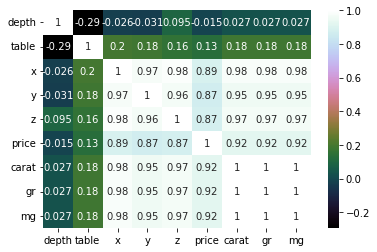

In [37]:
df_diamonds_corr = df_diamonds.corr()
sns.heatmap(df_diamonds_corr, annot=True, cmap="cubehelix");

In [39]:
df_diamonds_corr.reset_index()

,index,depth,table,x,y,z,price,carat,gr,mg
0,depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,-0.014864,0.026528,0.026528,0.026528
1,table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.130111,0.183392,0.183392,0.183392
2,x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.885848,0.975688,0.975688,0.975688
3,y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.866163,0.951667,0.951667,0.951667
4,z,0.094655,0.155189,0.984876,0.964828,1.000000,0.874500,0.967570,0.967570,0.967570
5,price,-0.014864,0.130111,0.885848,0.866163,0.874500,1.000000,0.921935,0.921935,0.921935
6,carat,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935,1.000000,1.000000,1.000000
7,gr,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935,1.000000,1.000000,1.000000
8,mg,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935,1.000000,1.000000,1.000000
